## Exploring Data on Closed Mobile Home Parks in LA County

To strengthen our understanding of mobile home park communities throughout LA County, we seek to do a more detailed analysis and identify what differences exist between mobile home parks depending on their location. These differences may include differences in zoning, resident household income, racial demographics, and mobile home park size. 

We believe doing an analysis and comparison between mobile home parks that have closed and those that remain open will tell/reveal a more compelling narrative on mobile home parks and their perceived accessibility as an affordable housing option. In this notebook, I will be doing exploring data on closed mobile home parks. 

## Importing the Libraries and Initial Exploration

Step 1. Import the libraries

In [99]:
import osmnx as ox
import geopandas as gpd
import contextily as ctx
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

Step 2. Import the data file

In [100]:
closedmhps = gpd.read_file('data/closedmhps_geocoded.geojson')

Step 3. Using "basic" commands to become familiar with this data set to understand how large it is, the column types, and the general information it contains. I can see all of the columns, the number of rows, the top and bottom 5 rows etc. 

In [101]:
closedmhps.shape

(59, 16)

In [102]:
closedmhps.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Park Name           59 non-null     object  
 1   County              59 non-null     object  
 2   Park Identifier     59 non-null     object  
 3   Park Address        59 non-null     object  
 4   city                59 non-null     object  
 5   zipcode             59 non-null     int64   
 6   phone number        49 non-null     object  
 7   Fire Authority      59 non-null     object  
 8   Jurisdiction        59 non-null     object  
 9   MH Spaces           51 non-null     float64 
 10  RV Lots W/Drains    51 non-null     float64 
 11  RV Lots W/O Drains  51 non-null     float64 
 12  Operated by         50 non-null     object  
 13  lat                 59 non-null     float64 
 14  lon                 59 non-null     float64 
 15  geometry            59 non-null   

In [103]:
closedmhps.head()

,Park Name,County,Park Identifier,Park Address,city,zipcode,phone number,Fire Authority,Jurisdiction,MH Spaces,RV Lots W/Drains,RV Lots W/O Drains,Operated by,lat,lon,geometry
0,ALLGEYER PARK,LOS ANGELES,19-0005-MP,"2920 ALLGEYER, EL MONTE , 91733",EL MONTE,91733,(310) 676-0663,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",21.0,0.0,0.0,"FRANK, DORIS, 2239 PARKWAY DR #7, EL MONTE, CA...",34.059780,-118.018559,POINT (-13137765.868 4036831.838)
1,GUILLEN TP,LOS ANGELES,19-0025-MP,"1240 NADEAU ST, LOS ANGELES , 90001",LOS ANGELES,90001,(213) 585-8828,"HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",15.0,0.0,0.0,"GUILLEN, JOSE, C/O GUILLEN TRAILER PARK 1240 N...",33.967385,-118.253825,POINT (-13163955.552 4024423.480)
2,RES MOR TP,LOS ANGELES,19-0056-MP,"13651 GARVEY AVE, BALDWIN PARK , 91706",BALDWIN PARK,91706,(310) 920-8148,"null, null","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",16.0,0.0,0.0,"LEE WAYNE & CO, 15865B GALE AVE SUITE # 428, C...",34.069674,-117.971467,POINT (-13132523.668 4038161.424)
3,BLUE BIRD TP,LOS ANGELES,19-0067-MP,"8827 E ARTESIA BLVD, BELLFLOWER , 90706",BELLFLOWER,90706,(310) 633-2955,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",11.0,0.0,3.0,"BOGGS, VIRGINIA, PO BOX 787, BELLFLOWER, CA 90706",33.874661,-118.151442,POINT (-13152558.338 4011984.505)
4,BLUE BONNET TP,LOS ANGELES,19-0068-MP,"4432 MANHATTAN BEACH BLVD, LAWNDALE , 90260",LAWNDALE,90260,(310) 545-7498,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",11.0,0.0,0.0,"LAWNDALE REDEVELOPMENT AGENCY, 14717 BURIN AVE...",33.887247,-118.353424,POINT (-13175042.942 4013672.115)


In [104]:
closedmhps.tail()

,Park Name,County,Park Identifier,Park Address,city,zipcode,phone number,Fire Authority,Jurisdiction,MH Spaces,RV Lots W/Drains,RV Lots W/O Drains,Operated by,lat,lon,geometry
54,VILLA CAPRI MHP,LOS ANGELES,19-1509-MP,"3427 BALDWIN PARK BLVD, BALDWIN PARK , 91706",BALDWIN PARK,91706,(818) 960-9972,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",13.0,0.0,0.0,"MAMONE, CLOVER, 2014 SOUTH VINE AVE., ONTARIO,...",34.086442,-117.964919,POINT (-13131794.748 4040415.016)
55,EAST SHORE RV PARK,LOS ANGELES,19-1511-MP,"1440 CAMPER VIEW RD, SAN DIMAS , 91773",SAN DIMAS,91773,(909) 599-8355,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",0.0,519.0,25.0,"COOK, PHYLLIS, 1440 CAMPER VIEW RD, SAN DIMAS,...",34.087687,-117.793379,POINT (-13112698.920 4040582.341)
56,WALNUT LODGE CT,LOS ANGELES,19-1535-MP,"9515 WHITTIER BLVD, PICO RIVERA , 90660",PICO RIVERA,90660,(562) 695-7700,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",34.0,0.0,0.0,"KAHALA PROPERTIES INC, PO BOX 2842, LAGUNA HIL...",33.997147,-118.074009,POINT (-13143938.600 4028418.939)
57,AVOLON CARSON MH/RV PARK,LOS ANGELES,19-1565-MP,"616 E CARSON ST, CARSON , 90745",CARSON,90745,(310) 834-3175,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",67.0,108.0,0.0,"WONG, DARRYL, 802 N VERMONT AVE #109, LOS ANGE...",33.831502,-118.265310,POINT (-13165234.068 4006199.286)
58,AZUSA SPRINGS PARTNERS,LOS ANGELES,19-1577-MP,"100 OLD SAN GABRIEL CANYON RD, AZUSA , 91702",AZUSA,91702,(818) 368-0933,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",12.0,0.0,0.0,"WATERSHED CONSERVATION AUTHORITY, 900 S. FREMO...",34.161821,-117.893382,POINT (-13123831.231 4050551.423)


## What city has the highest number of closed mobile home parks?

I am most interested in finding out what city has the highest number of closed mobile home parks and identifying how it relates (or doesn't relate) to the city we know to have the highest number of still existing mobile home parks (El Monte). 

First, let's get a basic understanding of where the closed parks are.

<AxesSubplot:>

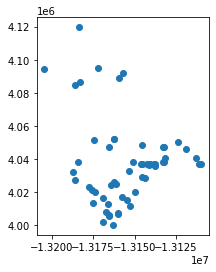

In [105]:
closedmhps.plot()

I can see a general shape, but this doesn't tell me which cities are represented or the number of closed parks within each city. Let's dig a little deeper.

In [106]:
closedmhps['city'].value_counts()

 CARSON             6
 EL MONTE           5
 LOS ANGELES        5
 BALDWIN PARK       3
 GLENDALE           3
 INGLEWOOD          3
 ROSEMEAD           3
 SANTA CLARITA      2
 ACTON              2
 S EL MONTE         2
 POMONA             2
 DUARTE             2
 PICO RIVERA        2
 GARDENA            1
 WILMINGTON         1
 PASADENA           1
 MONTEREY PARK      1
 AGUA DULCE         1
 BURBANK            1
 SAN DIMAS          1
 HARBOR CITY        1
 HUNTINGTON PARK    1
 GLENDORA           1
 DOWNEY             1
 PARAMOUNT          1
 CASTAIC            1
 LAKE HUGHES        1
 SANTA MONICA       1
 LYNWOOD            1
 LAWNDALE           1
 BELLFLOWER         1
 AZUSA              1
Name: city, dtype: int64

I want to save this city information so I can focus on this specifically.

In [107]:
citynumbers = closedmhps['city'].value_counts()

In [108]:
citynumbers

 CARSON             6
 EL MONTE           5
 LOS ANGELES        5
 BALDWIN PARK       3
 GLENDALE           3
 INGLEWOOD          3
 ROSEMEAD           3
 SANTA CLARITA      2
 ACTON              2
 S EL MONTE         2
 POMONA             2
 DUARTE             2
 PICO RIVERA        2
 GARDENA            1
 WILMINGTON         1
 PASADENA           1
 MONTEREY PARK      1
 AGUA DULCE         1
 BURBANK            1
 SAN DIMAS          1
 HARBOR CITY        1
 HUNTINGTON PARK    1
 GLENDORA           1
 DOWNEY             1
 PARAMOUNT          1
 CASTAIC            1
 LAKE HUGHES        1
 SANTA MONICA       1
 LYNWOOD            1
 LAWNDALE           1
 BELLFLOWER         1
 AZUSA              1
Name: city, dtype: int64

<AxesSubplot:>

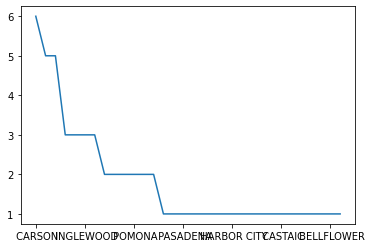

In [109]:
citynumbers.plot()

<AxesSubplot:title={'center':'Closed Mobile Home Parks in Each City'}>

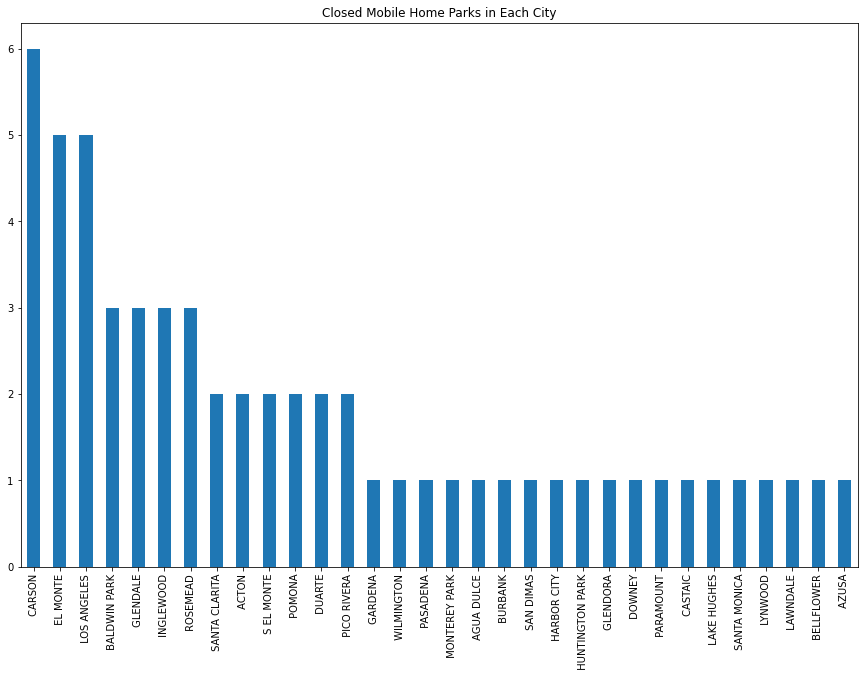

In [110]:
citynumbers.plot.bar(
    figsize=(15,10), x = 'City', y = 'count', title = 'Closed Mobile Home Parks in Each City')

The city of Carson clearly has the highest number of closed mobile home parks with El Monte in 2nd. Interesting...

We know that not all mobile home parks are the same size or have the same types of mobile homes. I would like to explore this aspect and find out how large each mobile home park was/how many homes were lost/removed/relocated in relation to the closures. 

## Identifying Data Values

In [111]:
closedmhps

,Park Name,County,Park Identifier,Park Address,city,zipcode,phone number,Fire Authority,Jurisdiction,MH Spaces,RV Lots W/Drains,RV Lots W/O Drains,Operated by,lat,lon,geometry
0,ALLGEYER PARK,LOS ANGELES,19-0005-MP,"2920 ALLGEYER, EL MONTE , 91733",EL MONTE,91733,(310) 676-0663,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",21.0,0.0,0.0,"FRANK, DORIS, 2239 PARKWAY DR #7, EL MONTE, CA...",34.059780,-118.018559,POINT (-13137765.868 4036831.838)
1,GUILLEN TP,LOS ANGELES,19-0025-MP,"1240 NADEAU ST, LOS ANGELES , 90001",LOS ANGELES,90001,(213) 585-8828,"HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",15.0,0.0,0.0,"GUILLEN, JOSE, C/O GUILLEN TRAILER PARK 1240 N...",33.967385,-118.253825,POINT (-13163955.552 4024423.480)
2,RES MOR TP,LOS ANGELES,19-0056-MP,"13651 GARVEY AVE, BALDWIN PARK , 91706",BALDWIN PARK,91706,(310) 920-8148,"null, null","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",16.0,0.0,0.0,"LEE WAYNE & CO, 15865B GALE AVE SUITE # 428, C...",34.069674,-117.971467,POINT (-13132523.668 4038161.424)
3,BLUE BIRD TP,LOS ANGELES,19-0067-MP,"8827 E ARTESIA BLVD, BELLFLOWER , 90706",BELLFLOWER,90706,(310) 633-2955,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",11.0,0.0,3.0,"BOGGS, VIRGINIA, PO BOX 787, BELLFLOWER, CA 90706",33.874661,-118.151442,POINT (-13152558.338 4011984.505)
4,BLUE BONNET TP,LOS ANGELES,19-0068-MP,"4432 MANHATTAN BEACH BLVD, LAWNDALE , 90260",LAWNDALE,90260,(310) 545-7498,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",11.0,0.0,0.0,"LAWNDALE REDEVELOPMENT AGENCY, 14717 BURIN AVE...",33.887247,-118.353424,POINT (-13175042.942 4013672.115)
5,VAGABOND HAVEN TP,LOS ANGELES,19-0104-MP,"3005 BIG DALTON, BALDWIN PARK , 91706",BALDWIN PARK,91706,(818) 284-0958,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",20.0,0.0,0.0,"DEGREVE, MAURICE, MARIE DEGREVE 1828 S VEGA ST...",34.069944,-117.966539,POINT (-13131975.108 4038197.735)
6,HOLIDAY TRAILER,LOS ANGELES,19-0114-MP,"11013 PRAIRIE, INGLEWOOD , 90305",INGLEWOOD,90305,(310) 671-8405,"null, null","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",NaN,NaN,NaN,None,33.935476,-118.343999,POINT (-13173993.663 4020141.263)
7,ASHLEYS TP,LOS ANGELES,19-0155-MP,"4309 CARLIN AVE, LYNWOOD , 90262",LYNWOOD,90262,(805) 944-3434,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","LYNWOOD BUILDING DEPARTMENT, MOBILEHOME PARKS ...",22.0,0.0,0.0,"CARLIN AVENUE VILLAGE, LLC, 3300 IRVINE AVENUE...",33.911080,-118.194101,POINT (-13157307.106 4016868.491)
8,DUARTE TRAILER CT,LOS ANGELES,19-0177-MP,"1437 E HUNTINGTON DR, DUARTE , 91008",DUARTE,91008,(818) 858-9044,"null, null","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",28.0,0.0,0.0,"OATMAN, MICHELLE, 6537 COUNTRY CLUB DR, LA VER...",34.139772,-117.974937,POINT (-13132909.934 4047585.495)
9,CENTURY TRAILER PARK,LOS ANGELES,19-0186-MP,"3930 W CENTURY BLVD, INGLEWOOD , 90304",INGLEWOOD,90304,(310) 673-5093,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",24.0,0.0,0.0,"CITY OF INGLEWOOD, ONE MANCHESTER BLVD, INGLEW...",33.945364,-118.361441,POINT (-13175935.397 4021468.157)


Under the MH Spaces column, I see how many homes each mobile home park contained/had space for. I also see that there are a few parks that don't have any of that information. Let's get some more detailed information. 

While I initially thought about dropping all of the mobile home parks that don't have any information on number of spaces, I believe that their location may be useful to keep. So we'll continue to work with them. 

What are the average number of spaces for the closed parks?

In [112]:
closedmhps['MH Spaces'].describe()

count     51.000000
mean      29.333333
std       31.055220
min        0.000000
25%       12.000000
50%       21.000000
75%       34.500000
max      166.000000
Name: MH Spaces, dtype: float64

Alright, so the average is about 29 spaces per closed mobile home parks

What does this look like??

<AxesSubplot:>

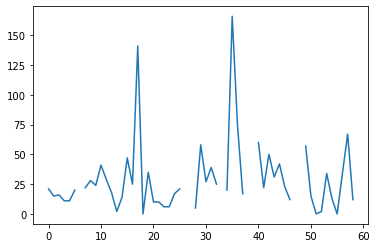

In [113]:
closedmhps['MH Spaces'].plot()

Not very clear to me, let's try that again.

<AxesSubplot:ylabel='Frequency'>

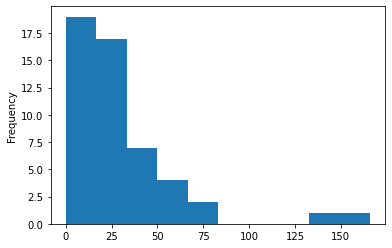

In [114]:
closedmhps['MH Spaces'].plot.hist()

Still not clear, one more time

<AxesSubplot:ylabel='Frequency'>

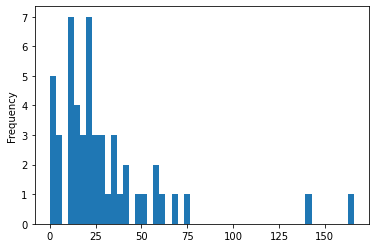

In [115]:
closedmhps['MH Spaces'].plot.hist(bins=50)

<AxesSubplot:title={'center':'Number of Spaces per Closed Mobile Home Parks in Each City'}, xlabel='city'>

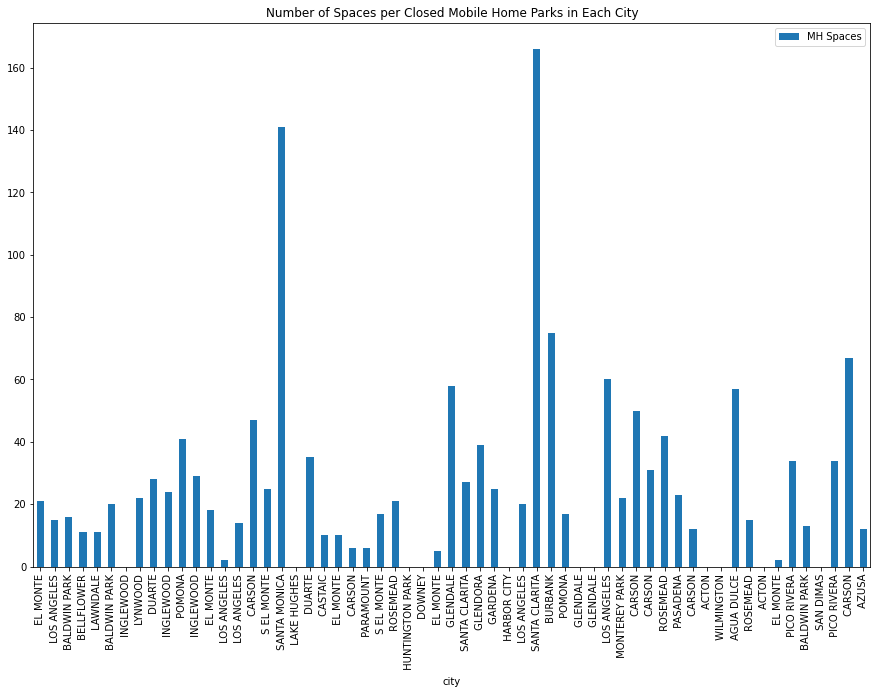

In [116]:
closedmhps.plot.bar(
    figsize=(15,10), x = 'city', y = 'MH Spaces', title = 'Number of Spaces per Closed Mobile Home Parks in Each City')

Can I plot this so it shows me how it looks like geographically??

<function contextily.plotting.add_basemap(ax, zoom='auto', source=None, interpolation='bilinear', attribution=None, attribution_size=8, reset_extent=True, crs=None, resampling=<Resampling.bilinear: 1>, **extra_imshow_args)>

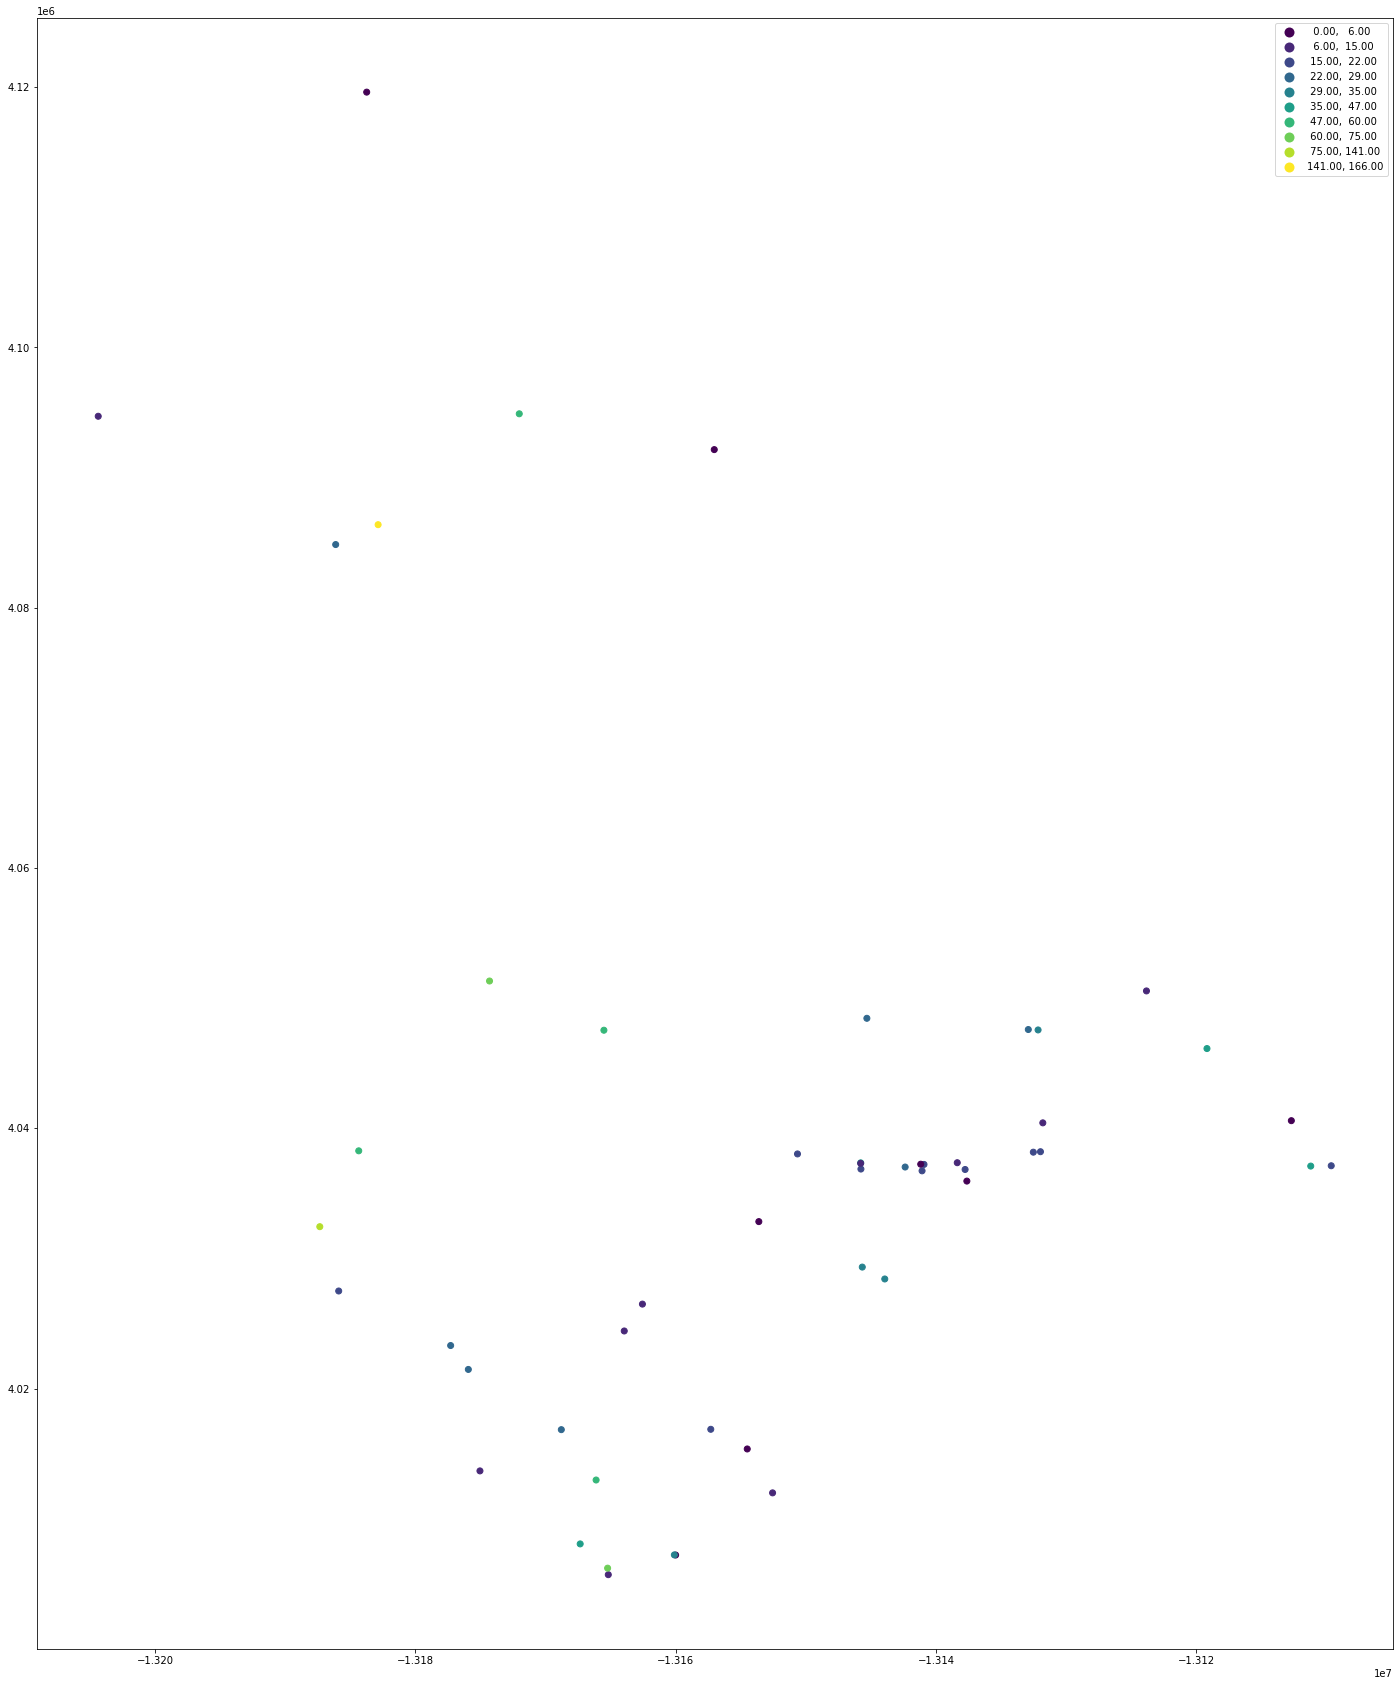

In [117]:
closedmhps.plot(figsize=(30,30), column = 'MH Spaces', legend = True, scheme = 'NaturalBreaks',k=10)
ctx.add_basemap

In [118]:
closedmhps.head()

,Park Name,County,Park Identifier,Park Address,city,zipcode,phone number,Fire Authority,Jurisdiction,MH Spaces,RV Lots W/Drains,RV Lots W/O Drains,Operated by,lat,lon,geometry
0,ALLGEYER PARK,LOS ANGELES,19-0005-MP,"2920 ALLGEYER, EL MONTE , 91733",EL MONTE,91733,(310) 676-0663,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",21.0,0.0,0.0,"FRANK, DORIS, 2239 PARKWAY DR #7, EL MONTE, CA...",34.059780,-118.018559,POINT (-13137765.868 4036831.838)
1,GUILLEN TP,LOS ANGELES,19-0025-MP,"1240 NADEAU ST, LOS ANGELES , 90001",LOS ANGELES,90001,(213) 585-8828,"HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",15.0,0.0,0.0,"GUILLEN, JOSE, C/O GUILLEN TRAILER PARK 1240 N...",33.967385,-118.253825,POINT (-13163955.552 4024423.480)
2,RES MOR TP,LOS ANGELES,19-0056-MP,"13651 GARVEY AVE, BALDWIN PARK , 91706",BALDWIN PARK,91706,(310) 920-8148,"null, null","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",16.0,0.0,0.0,"LEE WAYNE & CO, 15865B GALE AVE SUITE # 428, C...",34.069674,-117.971467,POINT (-13132523.668 4038161.424)
3,BLUE BIRD TP,LOS ANGELES,19-0067-MP,"8827 E ARTESIA BLVD, BELLFLOWER , 90706",BELLFLOWER,90706,(310) 633-2955,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",11.0,0.0,3.0,"BOGGS, VIRGINIA, PO BOX 787, BELLFLOWER, CA 90706",33.874661,-118.151442,POINT (-13152558.338 4011984.505)
4,BLUE BONNET TP,LOS ANGELES,19-0068-MP,"4432 MANHATTAN BEACH BLVD, LAWNDALE , 90260",LAWNDALE,90260,(310) 545-7498,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",11.0,0.0,0.0,"LAWNDALE REDEVELOPMENT AGENCY, 14717 BURIN AVE...",33.887247,-118.353424,POINT (-13175042.942 4013672.115)


In [119]:
closedmhps.tail()

,Park Name,County,Park Identifier,Park Address,city,zipcode,phone number,Fire Authority,Jurisdiction,MH Spaces,RV Lots W/Drains,RV Lots W/O Drains,Operated by,lat,lon,geometry
54,VILLA CAPRI MHP,LOS ANGELES,19-1509-MP,"3427 BALDWIN PARK BLVD, BALDWIN PARK , 91706",BALDWIN PARK,91706,(818) 960-9972,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",13.0,0.0,0.0,"MAMONE, CLOVER, 2014 SOUTH VINE AVE., ONTARIO,...",34.086442,-117.964919,POINT (-13131794.748 4040415.016)
55,EAST SHORE RV PARK,LOS ANGELES,19-1511-MP,"1440 CAMPER VIEW RD, SAN DIMAS , 91773",SAN DIMAS,91773,(909) 599-8355,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",0.0,519.0,25.0,"COOK, PHYLLIS, 1440 CAMPER VIEW RD, SAN DIMAS,...",34.087687,-117.793379,POINT (-13112698.920 4040582.341)
56,WALNUT LODGE CT,LOS ANGELES,19-1535-MP,"9515 WHITTIER BLVD, PICO RIVERA , 90660",PICO RIVERA,90660,(562) 695-7700,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",34.0,0.0,0.0,"KAHALA PROPERTIES INC, PO BOX 2842, LAGUNA HIL...",33.997147,-118.074009,POINT (-13143938.600 4028418.939)
57,AVOLON CARSON MH/RV PARK,LOS ANGELES,19-1565-MP,"616 E CARSON ST, CARSON , 90745",CARSON,90745,(310) 834-3175,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",67.0,108.0,0.0,"WONG, DARRYL, 802 N VERMONT AVE #109, LOS ANGE...",33.831502,-118.265310,POINT (-13165234.068 4006199.286)
58,AZUSA SPRINGS PARTNERS,LOS ANGELES,19-1577-MP,"100 OLD SAN GABRIEL CANYON RD, AZUSA , 91702",AZUSA,91702,(818) 368-0933,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",12.0,0.0,0.0,"WATERSHED CONSERVATION AUTHORITY, 900 S. FREMO...",34.161821,-117.893382,POINT (-13123831.231 4050551.423)


In [120]:
mhspaces = closedmhps.to_crs(epsg=3857)

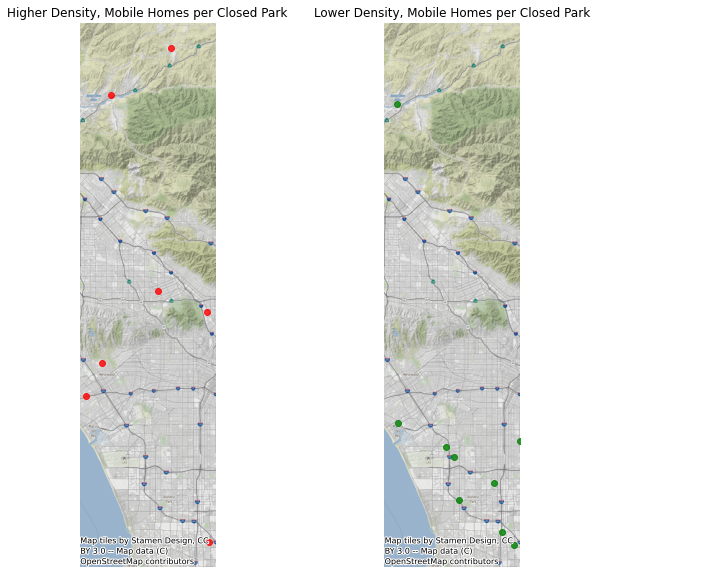

In [121]:
fix, axs = plt.subplots(1,2,sharex = True,sharey = True, figsize=(10,10))
ax1, ax2 = axs
mhspaces[mhspaces['MH Spaces']>50].plot(ax=ax1,alpha=0.8,color="red")
ax1.axis('off')
ax1.set_title("Higher Density, Mobile Homes per Closed Park")
ctx.add_basemap(ax1)

mhspaces[mhspaces['MH Spaces']<49].plot(ax=ax2,alpha=0.8,color="green")
ax2.axis('off')
ax2.set_title("Lower Density, Mobile Homes per Closed Park")
ctx.add_basemap(ax2)

Because my data set is on the smaller side, the distribution between closed mobile home parks with the highest and lowest number of MH Spaces is pretty even. The locations with a higher density are more spread out and in the northern/inland parts of the County, however.

Our data set also includes information on RV Spaces and utilities since RVs also qualify for spaces in mobile home parks, which I want to be intentional about including. 

In [122]:
closedmhps.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Park Name           59 non-null     object  
 1   County              59 non-null     object  
 2   Park Identifier     59 non-null     object  
 3   Park Address        59 non-null     object  
 4   city                59 non-null     object  
 5   zipcode             59 non-null     int64   
 6   phone number        49 non-null     object  
 7   Fire Authority      59 non-null     object  
 8   Jurisdiction        59 non-null     object  
 9   MH Spaces           51 non-null     float64 
 10  RV Lots W/Drains    51 non-null     float64 
 11  RV Lots W/O Drains  51 non-null     float64 
 12  Operated by         50 non-null     object  
 13  lat                 59 non-null     float64 
 14  lon                 59 non-null     float64 
 15  geometry            59 non-null   

Because I want to focus on the number of spaces and the presence/number of RV accomodations, I will run a few commands to determine the averages for each characteristic ("column").

In [123]:
closedmhps['MH Spaces'].describe()

count     51.000000
mean      29.333333
std       31.055220
min        0.000000
25%       12.000000
50%       21.000000
75%       34.500000
max      166.000000
Name: MH Spaces, dtype: float64

In [124]:
closedmhps['RV Lots W/Drains'].describe()

count     51.000000
mean      13.843137
std       74.011992
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      519.000000
Name: RV Lots W/Drains, dtype: float64

In [125]:
closedmhps['RV Lots W/O Drains'].describe()

count     51.000000
mean       6.352941
std       35.538612
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      252.000000
Name: RV Lots W/O Drains, dtype: float64

Since I am focusing on each of these characteristics, I want to save it as a new definition for the "Total"

In [126]:
closedmhps['total'] = closedmhps['MH Spaces'] + closedmhps['RV Lots W/Drains'] + closedmhps['RV Lots W/O Drains']

In [127]:
closedmhps['total'].describe()

count     51.000000
mean      49.529412
std       85.185997
min        2.000000
25%       15.000000
50%       24.000000
75%       41.500000
max      544.000000
Name: total, dtype: float64

With this new "total" definition, it'd also be interesting to see how the differences and % breakdown between the types of mobile home park spaces that existd in these closed MHPs. The results may not be significant since my data revealed that there weren't many RV spaces to begin with, but let's explore what this looks like anyway.

In [128]:
closedmhp_total = closedmhps['total'].sum()
print('Total Mobile Home Park Units: ' + str(closedmhp_total))

mhs_total = closedmhps['MH Spaces'].sum()
mhs_per = ((mhs_total/closedmhp_total)*100)
print('Mobile Homes: ' + str(mhs_total))
print('Mobile Homes percent: ' + str(mhs_per))

rv_total = closedmhps['RV Lots W/Drains'].sum()
rv_per = ((rv_total/closedmhp_total)*100)
print('RVs: ' + str(rv_total))
print('RVs with Drains percent: ' + str(rv_per))

rvnodrain_total = closedmhps['RV Lots W/O Drains'].sum()
rvnodrain_per = ((rvnodrain_total/closedmhp_total)*100)
print('RVs no Drains: ' + str(rvnodrain_total))
print('RVs wihtout Drains percent: ' + str(rvnodrain_per))

Total Mobile Home Park Units: 2526.0
Mobile Homes: 1496.0
Mobile Homes percent: 59.22406967537609
RVs: 706.0
RVs with Drains percent: 27.949326999208235
RVs no Drains: 324.0
RVs wihtout Drains percent: 12.826603325415679


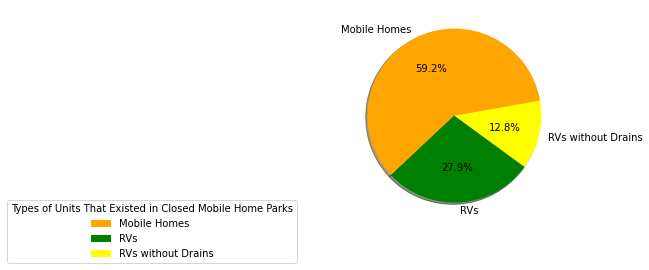

In [129]:
labels = ['Mobile Homes','RVs','RVs without Drains']
sizes = [mhs_total,rv_total,rvnodrain_total]
explode = (0,0,0.1) # I want my chunk to stick out

fig1, rent = plt.subplots()
rent.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=10, colors = ['orange','green','yellow'])
rent.legend(loc = 'lower right',bbox_to_anchor = (-0.2,-0.2),title = "Types of Units That Existed in Closed Mobile Home Parks")

plt.show()

While traditional mobile home untis were most common in closed mobile home parks, there was more diversity around unit type than I had initially expected.

In [130]:
from geopandas import GeoDataFrame
existing = GeoDataFrame(closedmhps)
type(existing)

geopandas.geodataframe.GeoDataFrame

/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:1718: UserWarning:


/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:1719: UserWarning:


/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:1718: UserWarning:


/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:1719: UserWarning:




<AxesSubplot:>

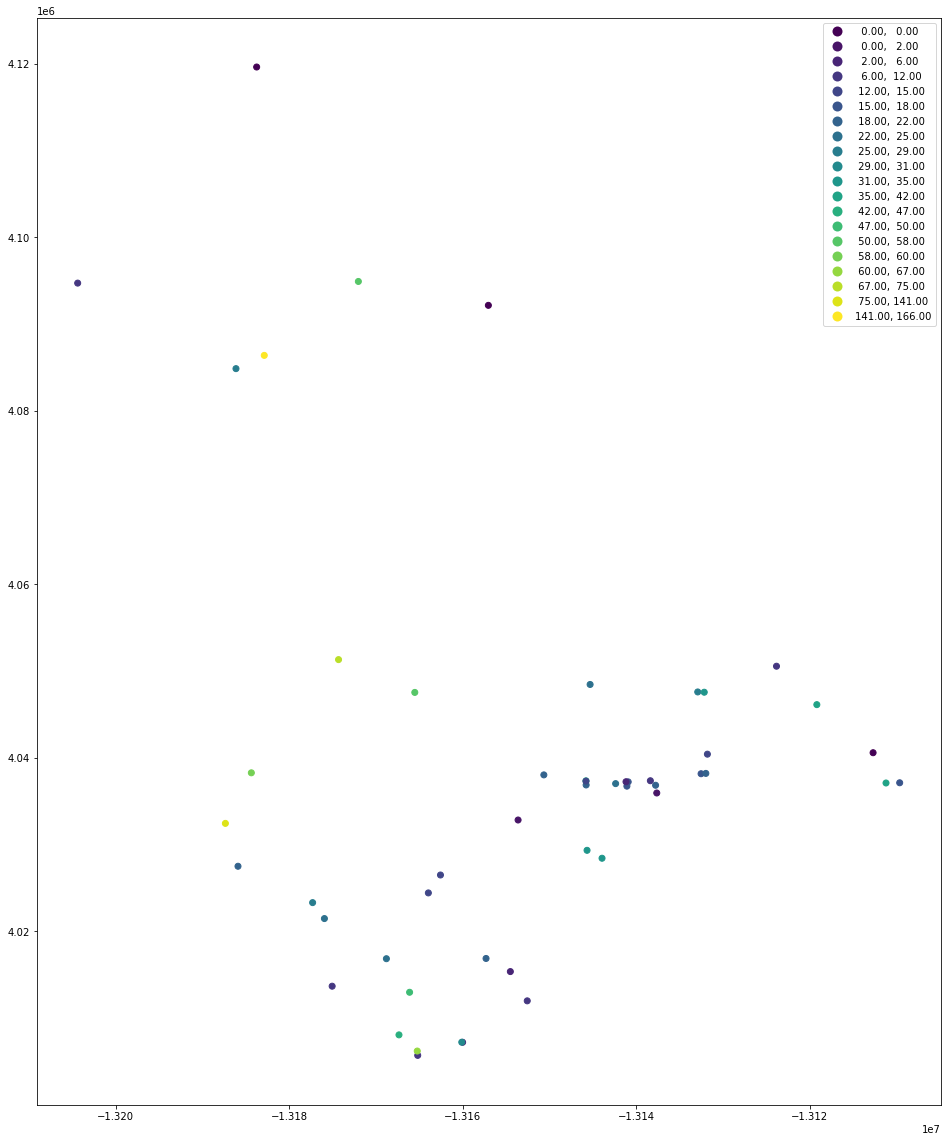

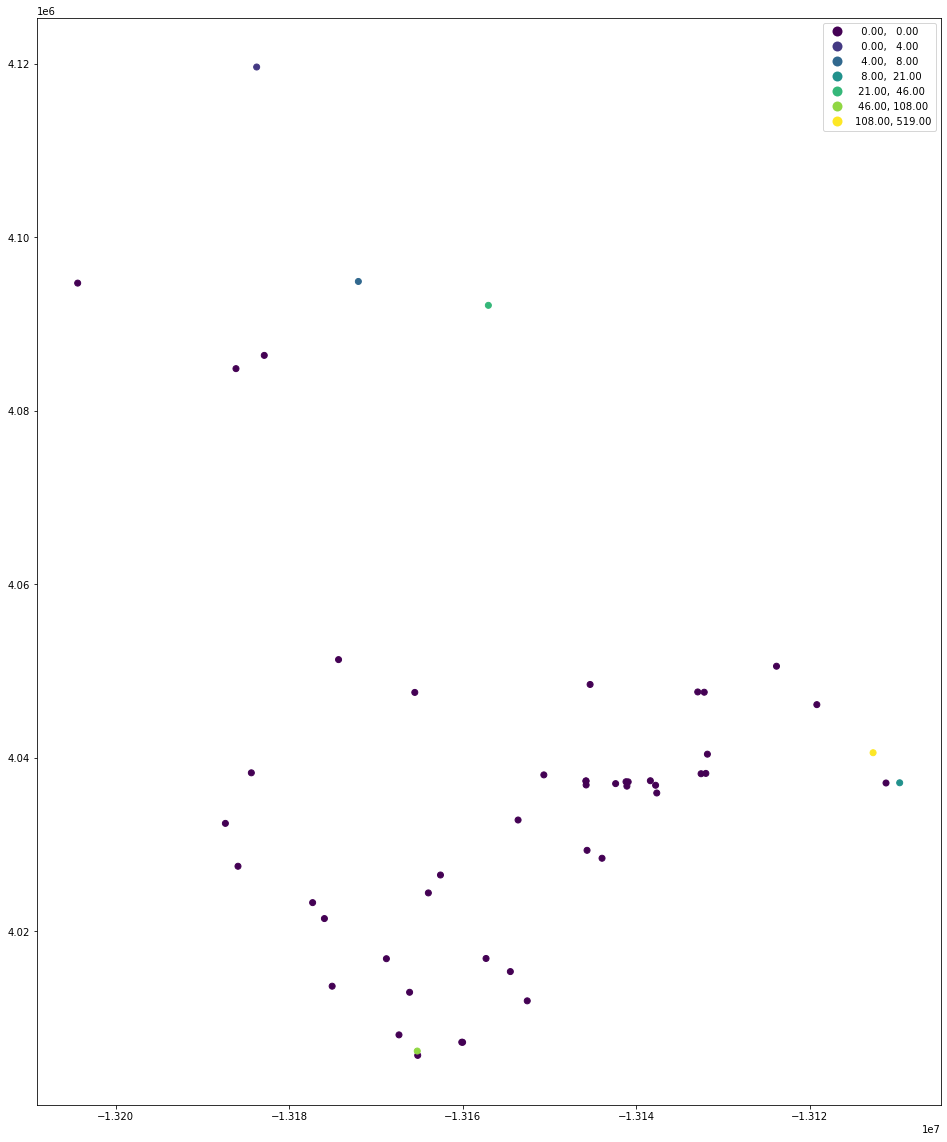

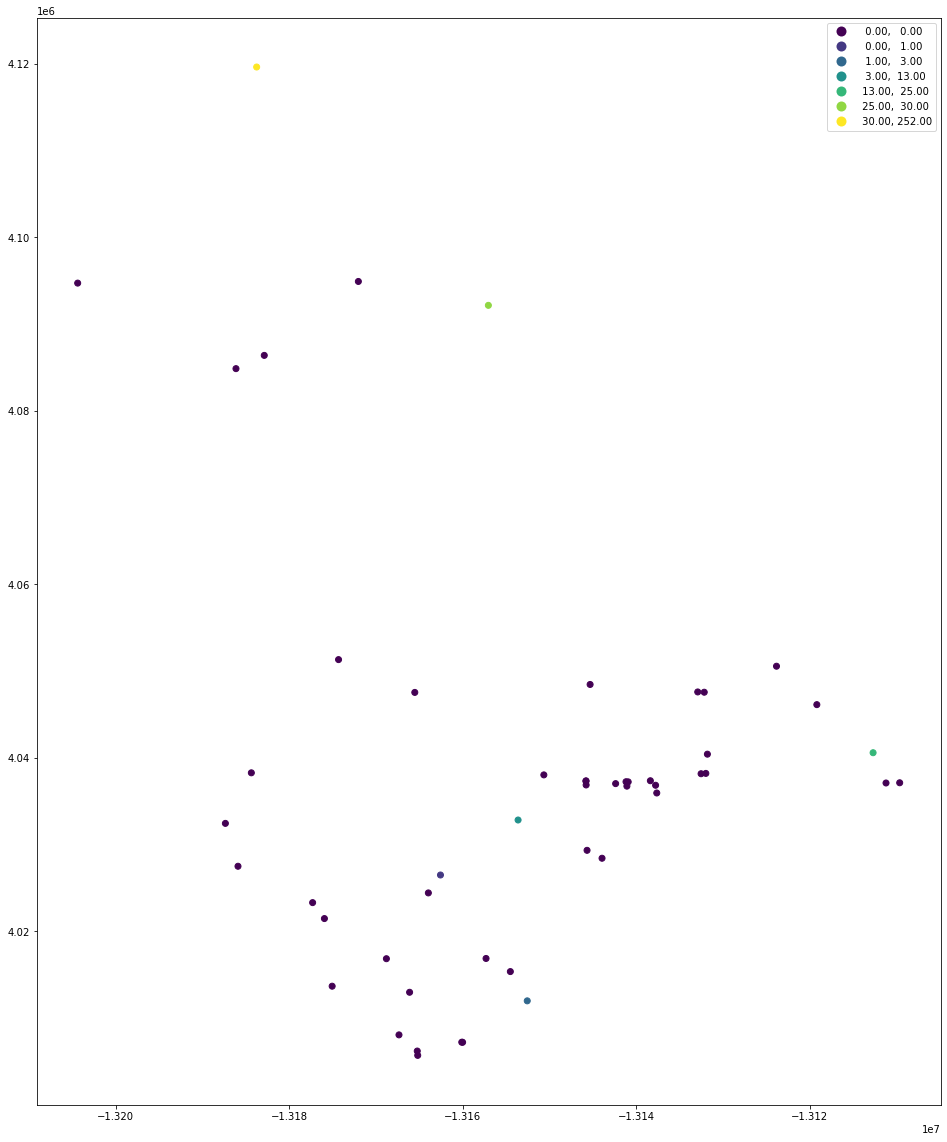

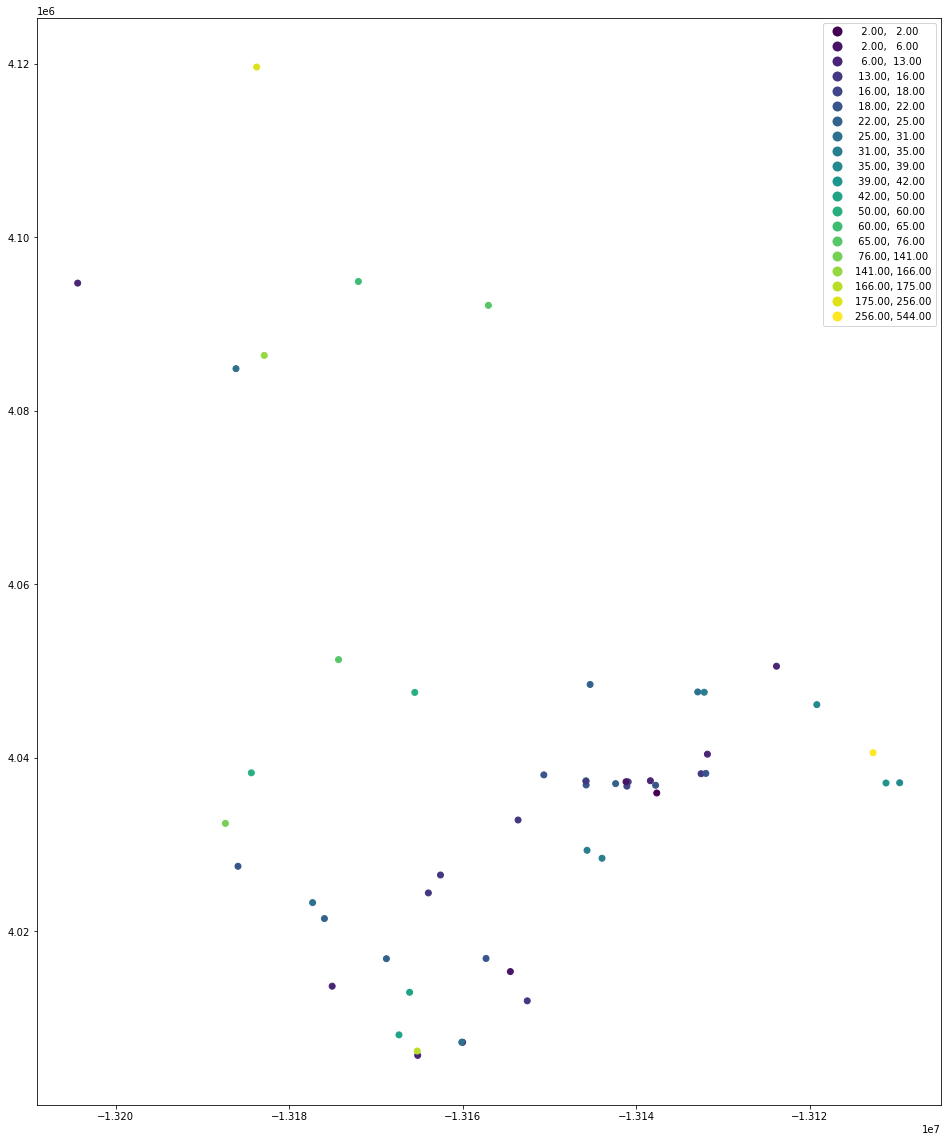

In [131]:
existing.plot(figsize=(20,20), column = 'MH Spaces', legend = True, scheme = 'NaturalBreaks',k=20)
existing.plot(figsize=(20,20), column = 'RV Lots W/Drains', legend = True, scheme = 'NaturalBreaks',k=20)
existing.plot(figsize=(20,20), column = 'RV Lots W/O Drains', legend = True, scheme = 'NaturalBreaks',k=20)
existing.plot(figsize=(20,20), column = 'total', legend = True, scheme = 'NaturalBreaks',k=20)

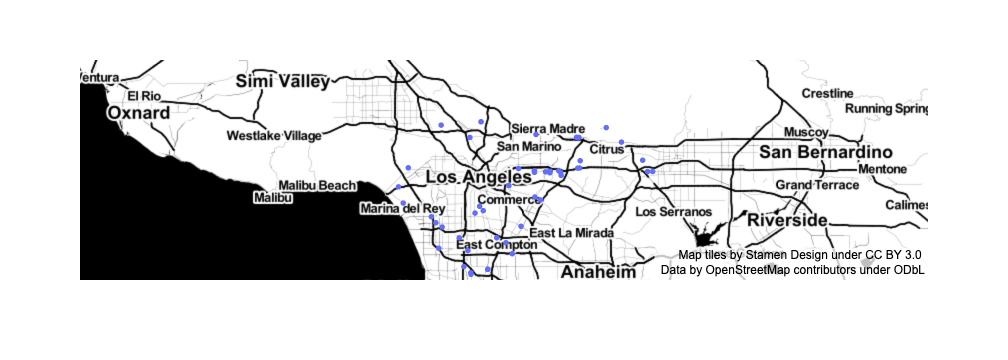

In [132]:
fig = px.scatter_mapbox(closedmhps,
                        lat='lat',
                        lon='lon',
                        mapbox_style="stamen-toner")
fig.show()

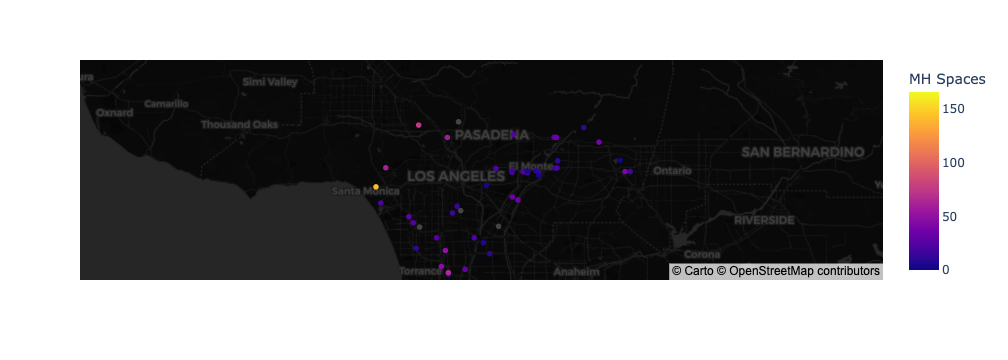

In [133]:
fig = px.scatter_mapbox(closedmhps, 
                        lat="lat", 
                        lon="lon", 
                        color="MH Spaces",
                        labels={'Mobile Homes':'Mobile Homes per Park'}
                       )

fig.update_layout(mapbox_style="carto-darkmatter")

fig.show()

In [134]:
fig.write_html("Mobile_Homes_plotly.html")

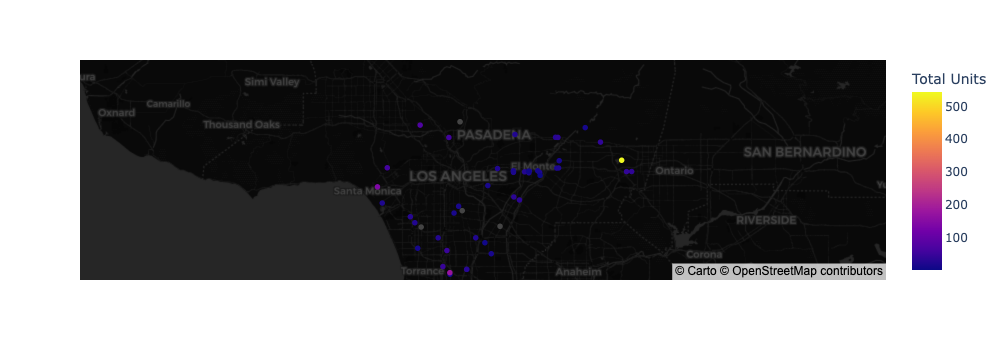

In [135]:
fig = px.scatter_mapbox(closedmhps, 
                        lat="lat", 
                        lon="lon", 
                        color="total",
                        labels={'total':'Total Units'}
                       )

fig.update_layout(mapbox_style="carto-darkmatter")

fig.show()

In [136]:
fig.write_html("Units_per_Park_plotly.html")

I want to map this out a little more so I can identify which location(s) had the highest number of units/closed mobile home parks, so I can conduct further analysis on them and determine how the closure of the MHPs may have impacted residents.

In [137]:
geoclosedmhps = gpd.GeoDataFrame(closedmhps, 
                                     crs="EPSG:4326",
                                     geometry=gpd.points_from_xy(closedmhps.lon, closedmhps.lat))

In [138]:
geoclosedmhps.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [139]:
geoclosedmhps_web_mercator = geoclosedmhps.to_crs(epsg=3857)

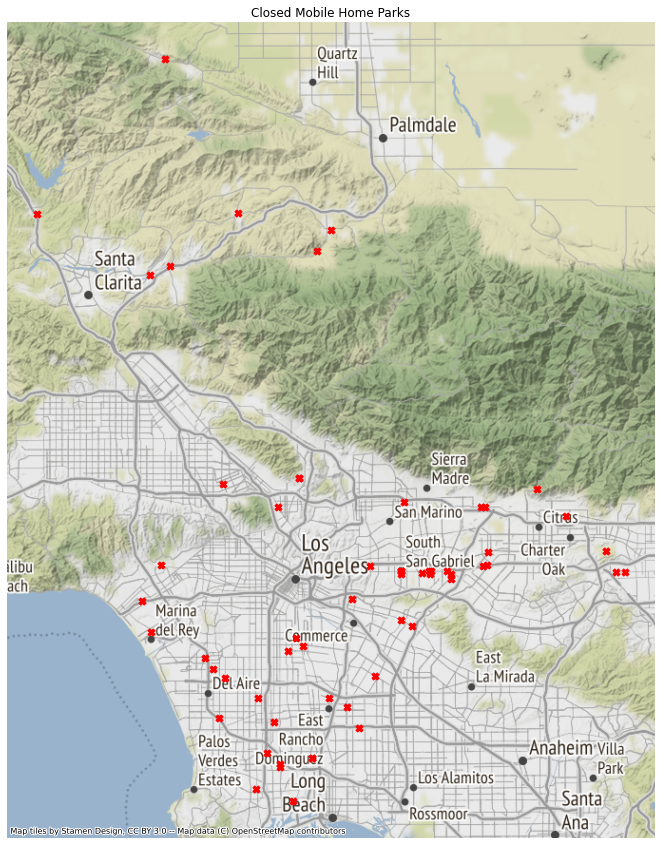

In [140]:
fig, ax = plt.subplots(figsize=(20,15))

geoclosedmhps_web_mercator.plot(ax=ax, 
                      marker='X',
                      markersize=50,
                      color='red')

ax.axis('off')

ax.set_title('Closed Mobile Home Parks')

ctx.add_basemap(ax)

I can see that there are more clusters around the San Gabriel Valley. Let's get some numbers on that.

In [141]:
geoclosedmhps.city.value_counts()

 CARSON             6
 EL MONTE           5
 LOS ANGELES        5
 BALDWIN PARK       3
 GLENDALE           3
 INGLEWOOD          3
 ROSEMEAD           3
 SANTA CLARITA      2
 ACTON              2
 S EL MONTE         2
 POMONA             2
 DUARTE             2
 PICO RIVERA        2
 GARDENA            1
 WILMINGTON         1
 PASADENA           1
 MONTEREY PARK      1
 AGUA DULCE         1
 BURBANK            1
 SAN DIMAS          1
 HARBOR CITY        1
 HUNTINGTON PARK    1
 GLENDORA           1
 DOWNEY             1
 PARAMOUNT          1
 CASTAIC            1
 LAKE HUGHES        1
 SANTA MONICA       1
 LYNWOOD            1
 LAWNDALE           1
 BELLFLOWER         1
 AZUSA              1
Name: city, dtype: int64

In [142]:
geoclosedmhps.city

0             EL MONTE
1          LOS ANGELES
2         BALDWIN PARK
3           BELLFLOWER
4             LAWNDALE
5         BALDWIN PARK
6            INGLEWOOD
7              LYNWOOD
8               DUARTE
9            INGLEWOOD
10              POMONA
11           INGLEWOOD
12            EL MONTE
13         LOS ANGELES
14         LOS ANGELES
15              CARSON
16          S EL MONTE
17        SANTA MONICA
18         LAKE HUGHES
19              DUARTE
20             CASTAIC
21            EL MONTE
22              CARSON
23           PARAMOUNT
24          S EL MONTE
25            ROSEMEAD
26     HUNTINGTON PARK
27              DOWNEY
28            EL MONTE
29            GLENDALE
30       SANTA CLARITA
31            GLENDORA
32             GARDENA
33         HARBOR CITY
34         LOS ANGELES
35       SANTA CLARITA
36             BURBANK
37              POMONA
38            GLENDALE
39            GLENDALE
40         LOS ANGELES
41       MONTEREY PARK
42              CARSON
43         

In [143]:
top_10_cities = geoclosedmhps.city.value_counts().head(10).index.tolist()
top_10_cities

[' CARSON',
 ' EL MONTE',
 ' LOS ANGELES',
 ' BALDWIN PARK',
 ' GLENDALE',
 ' INGLEWOOD',
 ' ROSEMEAD',
 ' SANTA CLARITA',
 ' ACTON',
 ' S EL MONTE']

So, definitively, Carson is the top city with the most amount of locations of closed mobile home parks. Now I have a city to focus on, specifically, moving forward.

In [144]:
geoclosedmhps[geoclosedmhps.city == ' CARSON'].head()

,Park Name,County,Park Identifier,Park Address,city,zipcode,phone number,Fire Authority,Jurisdiction,MH Spaces,RV Lots W/Drains,RV Lots W/O Drains,Operated by,lat,lon,geometry,total
15,MACKS TRAILER LODGE,LOS ANGELES,19-0390-MP,"17524 S FIGUEROA ST, CARSON , 90745",CARSON,90745,(213) 323-2312,"null, null","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",47.0,0.0,0.0,"BUCKLES, ROBERT, 1483 ALLENFORD AVE, LOS ANGEL...",33.845406,-118.284245,POINT (-118.28424 33.84541),47.0
22,SHADY NOOK TP,LOS ANGELES,19-0635-MP,"21009 PROSPECT AVE, CARSON , 90810",CARSON,90810,(818) 442-0383,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",6.0,0.0,0.0,"CARLSEN, KENT, PO BOX 8321, LONG BEACH, CA 90808",33.839029,-118.218364,POINT (-118.21836 33.83903),6.0
42,BEL ABBEY MHP,LOS ANGELES,19-1234-MP,"200 E GARDENA BLVD, CARSON , 90745",CARSON,90745,(310) 323-3073,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",50.0,0.0,0.0,"HAPPY TRAILS, 334 GARDENA BLV., GARDENA, CA 90248",33.882030,-118.273250,POINT (-118.27325 33.88203),50.0
43,DOMINGUEZ TP,LOS ANGELES,19-1311-MP,"2666 DOMINGUEZ ST, CARSON , 90810",CARSON,90810,(310) 679-2077,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",31.0,0.0,0.0,"CITY OF CARSON, CA, 1 CIVIC PLAZA, #500, LONG ...",33.839110,-118.219237,POINT (-118.21924 33.83911),31.0
46,LITTLE DUDE TP,LOS ANGELES,19-1327-MP,"630 E 220TH ST, CARSON , 90745",CARSON,90745,(909) 595-8635,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",12.0,0.0,0.0,"SHIMIZU, SIG, 630 E 220TH ST., CARSON, CA 90746",33.827767,-118.264843,POINT (-118.26484 33.82777),12.0


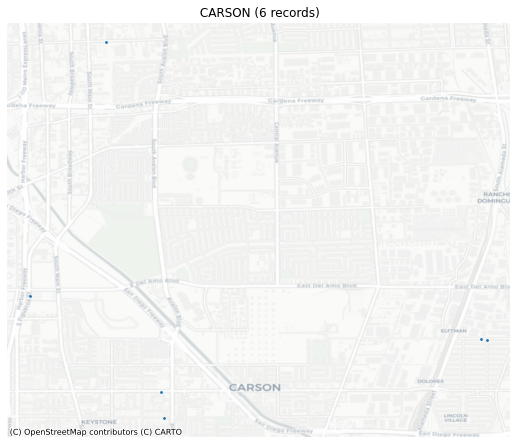

In [145]:
# city variable
City = ' CARSON'

# map
ax = geoclosedmhps[geoclosedmhps.city == City].plot(figsize=(9,9), markersize=3)

# title (including count)
ax.set_title(City + ' (' + str(geoclosedmhps[geoclosedmhps.city == City].shape[0]) + ' records)')

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:4326', 
                source=ctx.providers.CartoDB.Positron)

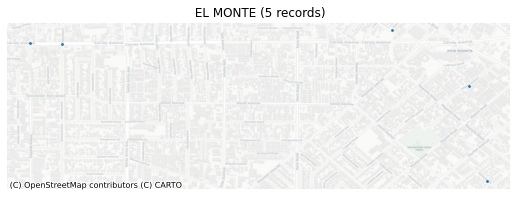

In [146]:
# city variable
City = ' EL MONTE'

# map
ax = geoclosedmhps[geoclosedmhps.city == City].plot(figsize=(9,9), markersize=3)

# title (including count)
ax.set_title(City + ' (' + str(geoclosedmhps[geoclosedmhps.city == City].shape[0]) + ' records)')

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:4326', 
                source=ctx.providers.CartoDB.Positron)

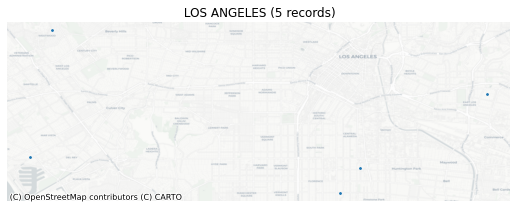

In [147]:
# city variable
City = ' LOS ANGELES'

# map
ax = geoclosedmhps[geoclosedmhps.city == City].plot(figsize=(9,9), markersize=3)

# title (including count)
ax.set_title(City + ' (' + str(geoclosedmhps[geoclosedmhps.city == City].shape[0]) + ' records)')

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:4326', 
                source=ctx.providers.CartoDB.Positron)

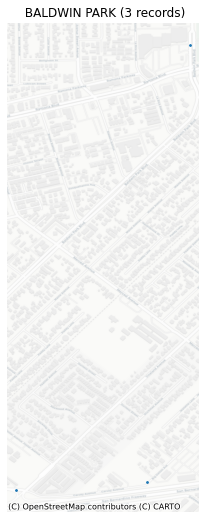

In [148]:
# city variable
City = ' BALDWIN PARK'

# map
ax = geoclosedmhps[geoclosedmhps.city == City].plot(figsize=(9,9), markersize=3)

# title (including count)
ax.set_title(City + ' (' + str(geoclosedmhps[geoclosedmhps.city == City].shape[0]) + ' records)')

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:4326', 
                source=ctx.providers.CartoDB.Positron)

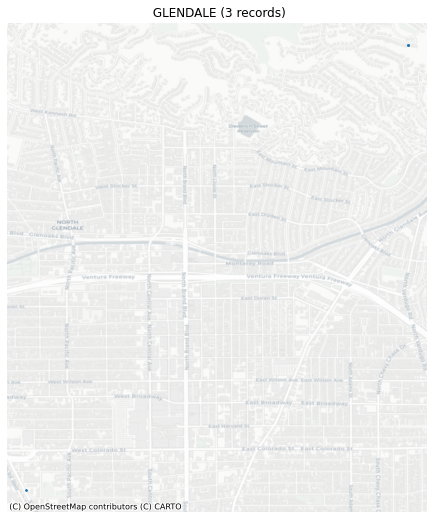

In [149]:
# city variable
City = ' GLENDALE'

# map
ax = geoclosedmhps[geoclosedmhps.city == City].plot(figsize=(9,9), markersize=3)

# title (including count)
ax.set_title(City + ' (' + str(geoclosedmhps[geoclosedmhps.city == City].shape[0]) + ' records)')

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:4326', 
                source=ctx.providers.CartoDB.Positron)

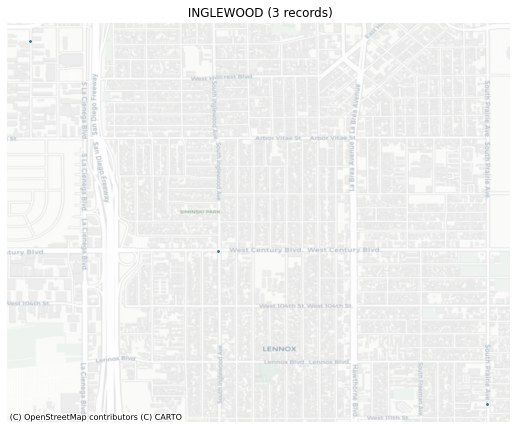

In [150]:
# city variable
City = ' INGLEWOOD'

# map
ax = geoclosedmhps[geoclosedmhps.city == City].plot(figsize=(9,9), markersize=3)

# title (including count)
ax.set_title(City + ' (' + str(geoclosedmhps[geoclosedmhps.city == City].shape[0]) + ' records)')

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:4326', 
                source=ctx.providers.CartoDB.Positron)

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning:

The inferred zoom level of 22 is not valid for the current tile provider (valid zooms: 0 - 20).



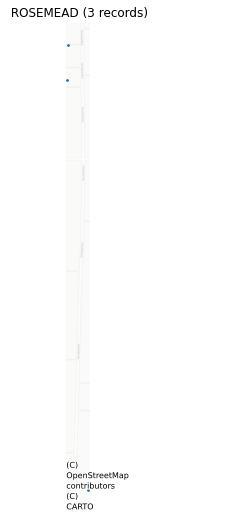

In [151]:
# city variable
City = ' ROSEMEAD'

# map
ax = geoclosedmhps[geoclosedmhps.city == City].plot(figsize=(9,9), markersize=3)

# title (including count)
ax.set_title(City + ' (' + str(geoclosedmhps[geoclosedmhps.city == City].shape[0]) + ' records)')

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:4326', 
                source=ctx.providers.CartoDB.Positron)

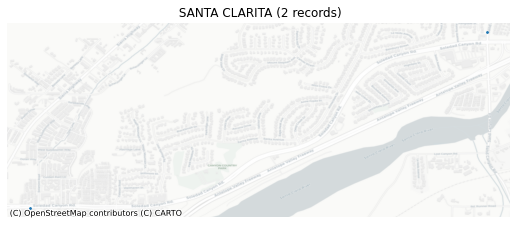

In [152]:
# city variable
City = ' SANTA CLARITA'

# map
ax = geoclosedmhps[geoclosedmhps.city == City].plot(figsize=(9,9), markersize=3)

# title (including count)
ax.set_title(City + ' (' + str(geoclosedmhps[geoclosedmhps.city == City].shape[0]) + ' records)')

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:4326', 
                source=ctx.providers.CartoDB.Positron)

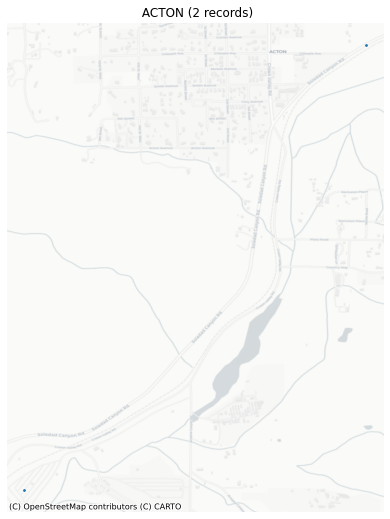

In [153]:
# city variable
City = ' ACTON'

# map
ax = geoclosedmhps[geoclosedmhps.city == City].plot(figsize=(9,9), markersize=3)

# title (including count)
ax.set_title(City + ' (' + str(geoclosedmhps[geoclosedmhps.city == City].shape[0]) + ' records)')

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:4326', 
                source=ctx.providers.CartoDB.Positron)

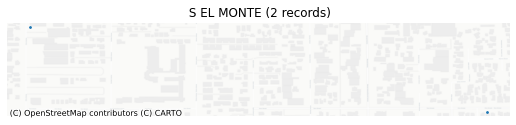

In [154]:
# city variable
City = ' S EL MONTE'

# map
ax = geoclosedmhps[geoclosedmhps.city == City].plot(figsize=(9,9), markersize=3)

# title (including count)
ax.set_title(City + ' (' + str(geoclosedmhps[geoclosedmhps.city == City].shape[0]) + ' records)')

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:4326', 
                source=ctx.providers.CartoDB.Positron)

The closed locations are pretty spread out around the city of Carson, and while 6 may not seem a significant number, there might be something worth looking into here. In my following notebooks, I will look more into demographic and zoning information for the closed mobile home parks in Carson.